In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from sklearn.cluster import (
    KMeans,
    AffinityPropagation,
    MeanShift,
    AgglomerativeClustering,
    DBSCAN,
    estimate_bandwidth
)
from sklearn.preprocessing import StandardScaler

In [4]:
file = pd.read_csv("s1.txt", delimiter="    ")

C:\Users\nikit\AppData\Local\Temp\ipykernel_23380\3764212423.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv("s1.txt", delimiter="    ")


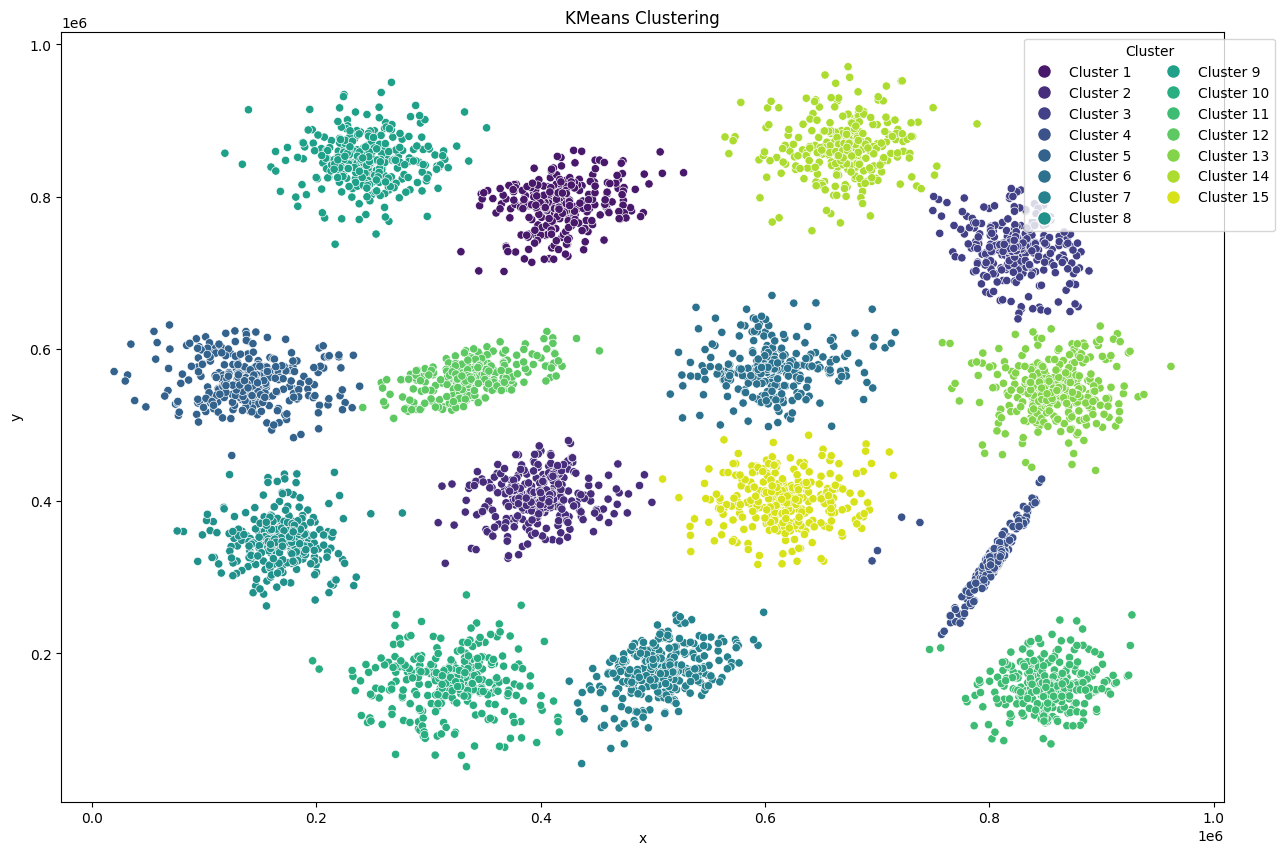

In [5]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(file)
labels = kmeans.labels_

plt.figure(figsize=(15, 10))
plt.title("KMeans Clustering")
plt.xlabel("x")
plt.ylabel("y")

palette = sns.color_palette("viridis", 15)
sns.scatterplot(x=file.iloc[:, 0], y=file.iloc[:, 1], hue=labels, palette=palette)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}", markerfacecolor=palette[i], markersize=10) for i in range(15)]
plt.legend(handles=legend_handles, title="Cluster", loc="upper right", bbox_to_anchor=(1.05, 1), ncol=2, prop={"size": 10})

plt.show()

In [11]:
# Чтение данных из файла
data = pd.read_csv('s1.txt', delimiter="    ", header=None)

# Преобразуем данные в numpy массив
X = data.values

# Выбор параметров
preference = -50
max_iter = 50
damping = 0.7
convergence_iter = 20

# Применение алгоритма
ap = AffinityPropagation(preference=preference, max_iter=max_iter, damping=damping, convergence_iter=convergence_iter)
ap.fit(X)

# Анализ результатов
labels = ap.labels_

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", legend="full")
plt.title('Affinity Propagation Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_23380\2939170455.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('s1.txt', delimiter="    ", header=None)


ValueError: Image size of 846x104773 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

In [7]:
X = file.values  # assuming your data is a Pandas DataFrame

bandwidth = estimate_bandwidth(X, quantile=0.2)

# Perform MeanShift clustering with the estimated bandwidth
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)
labels = ms.labels_

# Check the number of clusters
n_clusters = len(np.unique(labels))

# If the number of clusters is not 15, adjust the bandwidth iteratively
while n_clusters != 15:
    bandwidth -= 0.1
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))

# Visualize the clustering results using Seaborn
sns.set_style('whitegrid')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=sns.color_palette("husl", 15))
plt.title('MeanShift Clustering Results (15 clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

KeyboardInterrupt: 

array([[665845, 557965],
       [597173, 575538],
       [618600, 551446],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]])